# Notebook 5: Neural Decoding

Computational Biology 2 - WS 23/24

Material created by Katharina Bracher and Florian Eberhardt


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import json
from matplotlib import cm 
#last module only for color maps

/home/work/.conda/envs/py39env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Bayes theorem:  $P[s|r] = \frac{P[r|s]P[s]}{P[r]}$

(assuming that $P[r]\neq 0$)

- $P[s]$, the probability of stimulus s being presented, often called the
prior probability
- $P[r]$, the probability of response r being recorded
- $P[r, s]$, the probability of stimulus s being presented and responsebeing recorded. This is called the joint probability
-$P[r| s]$, the conditional probability of evoking response r, given that
stimulus s was presented
-$P[s|r]$, the conditional probability that stimulus s was presented,
given that response r was recorded.



### Problem 1: Bayesian Inference

- Explain how to compute $P[r]$, $P[s]$, $P[s|r]$, $P[r|s]$ from the joint probabiltiy P[r,s] What values are summed? What gets normalized?
- Compute $P[r]$, $P[s]$, $P[s|r]$, $P[r|s]$ from the joint probabiltiy P[r,s]. 
- Under the condition of measuring response **"4"**, what is the probabilty that Stimuls **"B"** was presented?  
Answer by reading the value directely from $P[s|r]$ and then computing it based on Bayes theorem. Confirm that the values are identical.

In [6]:
stimuli = np.arange(1,6)
responses = np.linspace(10,60,11, endpoint=True)

# probabiltiy density p(s,r)
ss, rr = np.meshgrid(stimuli, responses)
p = np.abs(np.sin(ss/1.5*rr/20.))
p = p / np.sum(p)  # normalize

json_data = {'prob_density': p.tolist(), 
             'stimuli': ['A', 'B', 'C', 'D', 'E', 'F'], 
             'responses': list(range(1,12))}

with open('./prob_density.json', 'w') as json_file:
    json.dump(json_data, json_file)


Text(0.5, 1.0, 'Joint probability\nP[s,r]')

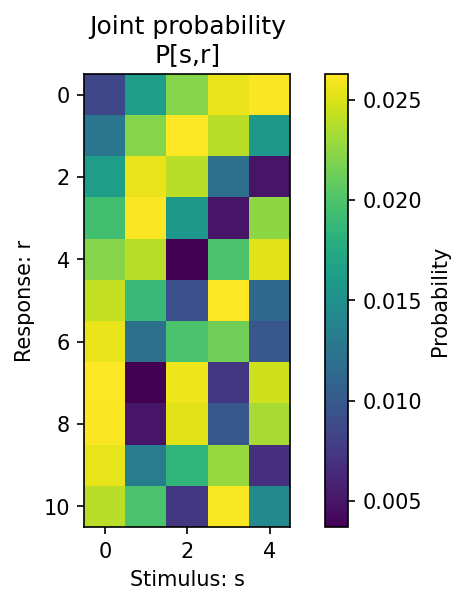

In [7]:
with open('./prob_density.json', 'r') as json_file:
    json_data = json.load(json_file)

p_rs = np.array(json_data['prob_density'])
stimuli = json_data['stimuli']
responses = json_data['responses']

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
ms = ax.imshow(p_rs)
ax.set_xlabel('Stimulus: s')
ax.set_ylabel('Response: r')
cbar = plt.colorbar(ms, label='Probability')
ax.set_title('Joint probability\nP[s,r]')

In [8]:
# TODO: What are the right functions?

def get_p_?():
    return np.sum(p_rs, axis=1)

def get_p_?():
    return np.sum(p_rs, axis=0)

def get_p_?():
    p = np.empty(np.shape(p_rs))
    for i in range(np.shape(p_rs)[1]):
        p[:,i] = p_rs[:,i] / np.sum(p_rs[:,i])
    return p
    
def get_p_?():
    p = np.empty(np.shape(p_rs))
    for i in range(np.shape(p_rs)[0]):
        p[i,:] = p_rs[i,:] / np.sum(p_rs[i,:])
    return p

p_r = get_p_r()
p_s = get_p_s()
p_r_cond_s = get_p_r_cond_s()
p_s_cond_r = get_p_s_cond_r()

SyntaxError: invalid syntax (2993704884.py, line 3)

In [9]:
# Solution
def get_p_r():
    return np.sum(p_rs, axis=1)

def get_p_s():
    return np.sum(p_rs, axis=0)

def get_p_r_cond_s():
    p = np.empty(np.shape(p_rs))
    for i in range(np.shape(p_rs)[1]):
        p[:,i] = p_rs[:,i] / np.sum(p_rs[:,i])
    return p
    
def get_p_s_cond_r():
    p = np.empty(np.shape(p_rs))
    for i in range(np.shape(p_rs)[0]):
        p[i,:] = p_rs[i,:] / np.sum(p_rs[i,:])
    return p

p_r = get_p_r()
p_s = get_p_s()
p_r_cond_s = get_p_r_cond_s()
p_s_cond_r = get_p_s_cond_r()

In [13]:
# Solution

# response 4 corresponds to index 5 on the response axis of p(s,r)
# stimulus B corresponds to index 1 on the stimulus axis of p(s,r)

# s=2, r=20
p_scr = get_p_s_cond_r()[5,1]
p_scr_bayes = get_p_r_cond_s()[5,1]*get_p_s()[1]/get_p_r()[5]

print(p_scr, p_scr_bayes)

0.21099052229865942 0.21099052229865942


---
### Problem 2: Did the sun just explode?

<img src="https://cdn-images-1.medium.com/max/936/1*kJHUF87cQNkxxPbeyEgHig.png" width="350">
Source: https://xkcd.com/1132/

Explain the bayesian statistician point of view.

__Frequentist inference does not account for the ‘prior’ probability of the sun exploding, and because it is based solely on observed data, a purely Frequentist method can run into problems. The Frequentist examines how likely the finding is in light of the null hypothesis, but it does not consider if the hypothesis is even more implausible a priori.__

---
### Problem 3: Neuronal response

<img src="https://www.researchgate.net/publication/230624328/figure/fig1/AS:214158353145856@1428070738125/Schematic-diagram-of-the-RDM-stimulus-with-different-motion-coherence-levels-In-each.png" width="500">

There are two different stimuli: Dots moving coherently right or dots moving coherently left. The strength of the coherence of the movement can be varied between 0 and 1.
Suppose that a neuron responds  on average with a different firing rates on the two different stimuli.
$r_+=50 Hz$ if dots are moving right (+direction) and $r_-=30 Hz$ if dots are moving left (- direction). 


The probabilities that a neuron responds to a motion coherence of strength $s$ with a firing rate between $r$ and $r+\Delta r$ is $p(r)\Delta r$ where 

$$ p(r) = \frac{1}{\sqrt{2\pi}\sigma} exp\left(-\frac{(r-r_m)^2}{2 \sigma^2}\right) $$

with mean $r_m = r_{+/-}$ and $\sigma = 10+2/s$.

a) Write a function that returns the values of $p(r|r_+)$ and $p(r|r_-)$ depending on the coherence of the motion.
Visualize $p(r|r_+)$ and $p(r|r_-)$ for coherence value $c\in \{0.1, 0.4, 0.7, 1.0 \}$

Normalize based on the assumption that the there are only integer firing rates and the min. and max. rates are 0 and 100 Hz. 

In [14]:
def firing_prob(motion_direction, coherence, r=np.arange(0,101,)):
    """
    motion_direction: -1 if left or +1 if right
    coherence: coherence of random dot stiumulus, value has to be between 0 and 1
    """
    if motion_direction == 1:       
        mean_rate = 50.
    elif motion_direction == -1:
        mean_rate = 30.
    
    std = 10. + 2/coherence
    
    p = 1./(np.sqrt(2.*np.pi)*std)*np.exp(-(r - mean_rate)**2/(2.*std**2))
    p = p/np.sum(p)
    return r, p

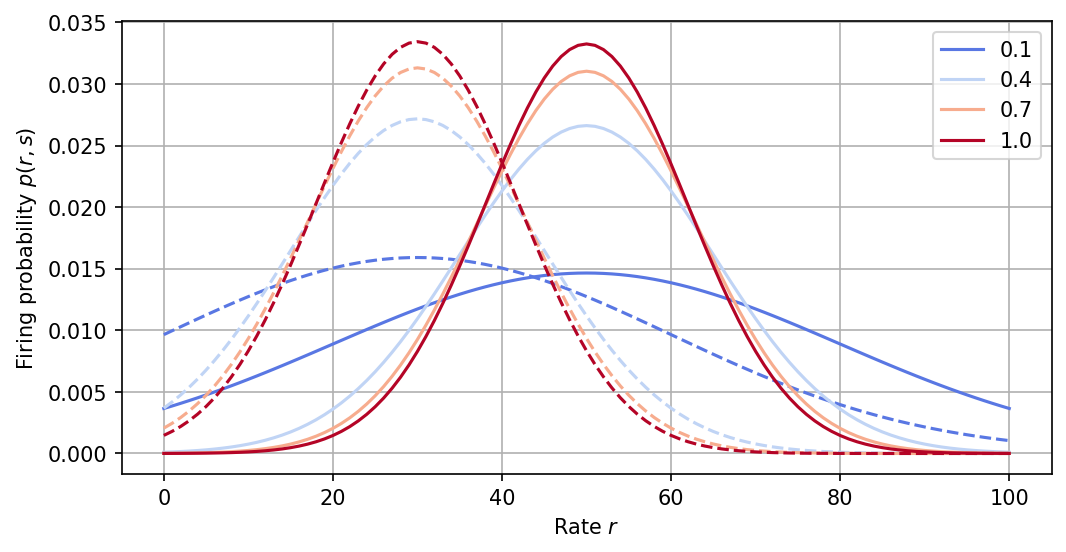

In [15]:
stimuli_coherence = [0.1, 0.4, 0.7, 1.0]
stimuli_direction = [-1,1]

fig, ax = plt.subplots(figsize=(8,4),dpi=150)

for coh in stimuli_coherence:
    r, p_right = firing_prob(motion_direction=1, coherence=coh)
    ax.plot(r, p_right, label = str(coh), c = cm.coolwarm(coh))
    r, p_left = firing_prob(motion_direction=-1, coherence=coh)
    ax.plot(r, p_left,  c = cm.coolwarm(coh), ls='--')

    
ax.set_xlabel(r"Rate $r$")
ax.set_ylabel(r"Firing probability $p(r, s)$")
ax.grid()
ax.legend()
plt.show()

### Problem 4: Hit rate  and false alarm rate
Based on a readout threshold for the firing rate we test which of the stiumli was presented.
Explain how the hit rate and the halse alarm rate change depending on the threshold $z$. Assume a fixed coherence of the dot motion.


- right curve: $p(r|+)$ - stimulus with right moving dots
- left curve: $p(r|S)$ - stimulus with left moving dots

<img src="https://www.cns.nyu.edu/~david/handouts/sdt/internal-response2.gif">

### Problem 5: Discriminability
We can quantify the discriminability by computing the 'overlap' of the two distribution. What is $d'$ (distance between means) for each of these stimuli?

- Compute $d$ for $p(r|r_+)$ and $p(r|r_-)$ depending on the coherence of the motion for coherence values $c\in \{0.1, 0.4, 0.7, 1.0 \}$.
Assume $$ p(r) = \frac{1}{\sqrt{2\pi}\sigma} exp\left(-\frac{(r-r_m)^2}{2 \sigma^2}\right) $$
with mean $r_m = r_{+/-}$ and $\sigma = 10+2/s$.
Ignore the fact that there should be a minimum and maximum firing rate.

- What are assumption did we make to compute $d$? For which coherence values are the assumptions justified?

- What can we conclude from different values of $d$?

In [16]:
mean_plus = 50.
mean_minus = 30.


c = [0.1, 0.4, 0.7, 1.0 ]

for c_i in c:
    std = 10. + 2/c_i
    d = (mean_plus - mean_minus) / std
    print('coherence '+ str(c_i*100) + '%')
    print('d =', d)
    print('---------------------')

coherence 10.0%
d = 0.6666666666666666
---------------------
coherence 40.0%
d = 1.3333333333333333
---------------------
coherence 70.0%
d = 1.5555555555555556
---------------------
coherence 100.0%
d = 1.6666666666666667
---------------------


__We made the assumptions that $r_+$ and $r_-$ are normally distributed and have the same variance. This assumption is approximately valid if the coherence is high.__

__The higher $d'$ the better is the separation between distributions, the better is behavioral performance.__

### Problem 6: Size and power
Compute the size and the power of the threshold test for coherence values $c\in \{0.1, 0.4, 0.7, 1.0 \}$. Vary the threshold $z$.


In [17]:
def alpha(c,z):
    r,p = firing_prob(motion_direction=-1, coherence=c)
    alpha_z = np.sum(p[r>=z])
    return alpha_z

def beta(c,z):
    r,p = firing_prob(motion_direction=+1, coherence=c)
    beta_z = np.sum(p[r>=z])
    return beta_z

In [18]:
alpha(0.5, 40), beta(0.5, 40)

(0.25235955557143525, 0.7735051019440172)

### Problem 7: Receiver Operating Characteristic

ROC charactersizes discrimination performance for all threshold ($z$) choices.

<img src="https://www.cns.nyu.edu/~david/handouts/sdt/criterion.gif">

Use the results from the previous excercise to plot the ROC-curve for coherence values $c\in \{0.1, 0.4, 0.7, 1.0 \}$.

Text(0, 0.5, '$\\beta$')

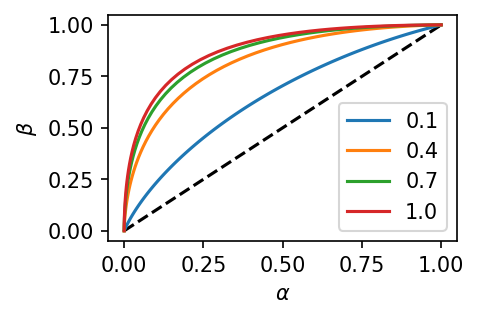

In [19]:
fig = plt.figure(figsize=(3,2),dpi=150)
ax= fig.add_subplot(111)
ax.plot([0,1],[0,1],'k--')
z = np.arange(0,101,1)
for c_i in [0.1, 0.4, 0.7, 1.0 ]:


    alpha_z = [alpha(c_i, z_i) for z_i in z]
    beta_z = [beta(c_i, z_i) for z_i in z]
    ax.plot(alpha_z, beta_z, label=str(c_i))

ax.legend()
ax.set_xlabel(r'$\alpha$')    
ax.set_ylabel(r'$\beta$')    


### Problem 8: Performance of the test in a two alternative force-choice task
To evaluate the performance of the test (probablity of beeing right) in a two alternative force-choice task, compute the area under the ROC curves depending on the motion coherence. 

How strong do we have to choose the coherence of the dot motion to make the right decision in at least 80% of the cases?

In [20]:
def area_under_ROC_curve(coherence,):
    z = np.arange(0,101,1)
    alpha_z = [alpha(coherence, z_i) for z_i in z]
    beta_z = [beta(coherence, z_i) for z_i in z]
    area = 0.
    for i in range(len(z)-1):
        d_alpha_i = np.abs(alpha_z[i+1]-alpha_z[i])
        beta_i = (beta_z[i+1]+beta_z[i])/2.
        area += d_alpha_i*beta_i
    return area

In [21]:
c_i = 0.5
area_under_curve = area_under_ROC_curve(c_i)
area_under_curve

0.841518374037193

/tmp/ipykernel_8164/1718043395.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  std = 10. + 2/coherence
/tmp/ipykernel_8164/1718043395.py:14: RuntimeWarning: divide by zero encountered in divide
  p = p/np.sum(p)
/tmp/ipykernel_8164/1718043395.py:14: RuntimeWarning: invalid value encountered in divide
  p = p/np.sum(p)


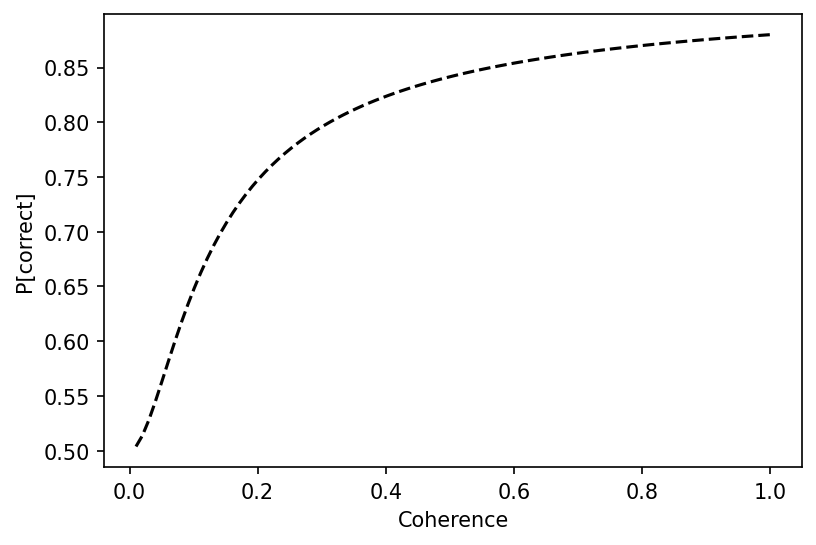

min coherence for beeing right in at leas 80% of cases: 0.31313131313131315


In [22]:
fig = plt.figure(dpi=150)
ax= fig.add_subplot(111)
p_correct = []
coh_values = np.linspace(0,1,100, endpoint=True)
for c_i in coh_values:
    area_under_curve = area_under_ROC_curve(c_i)
    p_correct.append(area_under_curve)

ax.plot(coh_values, p_correct, 'k--')
    
ax.set_xlabel('Coherence')
ax.set_ylabel('P[correct]')
plt.show()

p_correct = np.array(p_correct)
c_80=np.min(coh_values[p_correct >= 0.8])
print('min coherence for beeing right in at leas 80% of cases:', c_80)
